# Statistics for Business - Salary Regression Model

**Load data**

In [ ]:
# load data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# modelling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# cross validation using statsmodel preparation
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score, cross_validate, KFold

**Function**

In [ ]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from statsmodel
    :return df: <pandas DataFrame> combined estimated coefficient and standard error of model estimate
    """
    coef = results.params
    std_err = results.bse

    df = pd.DataFrame(data = np.transpose([coef, std_err]),
                      index = coef.index,
                      columns=["coef","std err"])
    return df

# 1. Persiapan Data

**Membaca data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data_Based_country_and_race.csv to Salary_Data_Based_country_and_race.csv


In [ ]:
Salary_Data = pd.read_csv("Salary_Data_Based_country_and_race.csv")
Salary_Data.rename(columns = {'Education Level':'EducationLevel', 'Years of Experience':'YearsOfExperience'}, inplace=True)
Salary_Data

,Unnamed: 0,Age,Gender,EducationLevel,Job Title,YearsOfExperience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


## 1.1. Handling Missing Value

**Mengecek missing value**

In [ ]:
Salary_Data.isna().sum()

Unnamed: 0           0
Age                  2
Gender               2
EducationLevel       3
Job Title            2
YearsOfExperience    3
Salary               5
Country              0
Race                 0
dtype: int64

In [ ]:
Salary_Data.shape

(6704, 9)

In [ ]:
Salary_Data[Salary_Data["Age"].isna()]

,Unnamed: 0,Age,Gender,EducationLevel,Job Title,YearsOfExperience,Salary,Country,Race
172,172,NaN,NaN,NaN,NaN,NaN,NaN,UK,White
260,260,NaN,NaN,NaN,NaN,NaN,NaN,Canada,White


**Menghapus missing value**

In [ ]:
Salary_Data = Salary_Data.dropna()

In [ ]:
Salary_Data.isna().sum()

Unnamed: 0           0
Age                  0
Gender               0
EducationLevel       0
Job Title            0
YearsOfExperience    0
Salary               0
Country              0
Race                 0
dtype: int64

In [ ]:
Salary_Data.shape

(6698, 9)

## 1.2. Handling Duplicated Data

**Mengecek duplicated data**

In [ ]:
Salary_Data.duplicated().sum()

0

In [ ]:
Salary_Data[Salary_Data.duplicated(keep=False)]

,Unnamed: 0,Age,Gender,EducationLevel,Job Title,YearsOfExperience,Salary,Country,Race


**Menghapus duplicated data**

In [ ]:
Salary_Data = Salary_Data.drop_duplicates(keep="first")
Salary_Data.duplicated().sum()

0

In [ ]:
Salary_Data

,Unnamed: 0,Age,Gender,EducationLevel,Job Title,YearsOfExperience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


# 2. Deskripsi Data

In [ ]:
Salary_Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6698.0,3351.922216,1934.949414,0.0,1676.25,3352.5,5026.75,6703.0
Age,6698.0,33.623022,7.615784,21.0,28.00,32.0,38.00,62.0
YearsOfExperience,6698.0,8.095178,6.060291,0.0,3.00,7.0,12.00,34.0
Salary,6698.0,115329.253061,52789.792507,350.0,70000.00,115000.0,160000.00,250000.0


In [ ]:
Salary_Data["Gender"].value_counts()

Male      3671
Female    3013
Other       14
Name: Gender, dtype: int64

In [ ]:
#Other akan dihapus karena dianggap oulier
# Find indices where Gender is 'Other'
indices_to_drop = Salary_Data[Salary_Data['Gender'] == 'Other'].index

# Drop rows with 'Other' gender
df_salary = Salary_Data.drop(indices_to_drop)
df_salary

,Unnamed: 0,Age,Gender,EducationLevel,Job Title,YearsOfExperience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


In [ ]:
df_salary["EducationLevel"].value_counts()

Bachelor's Degree    2265
Master's Degree      1570
PhD                  1368
Bachelor's            756
High School           436
Master's              288
phD                     1
Name: EducationLevel, dtype: int64

In [ ]:
df_salary['EducationLevel'] = df_salary['EducationLevel'].str.replace(r"Bachelor's Degree","Bachelor's")
df_salary['EducationLevel'] = df_salary['EducationLevel'].str.replace(r"Master's Degree","Master's")
df_salary['EducationLevel'] = df_salary['EducationLevel'].str.replace(r'phD',"PhD")

In [ ]:
df_salary["EducationLevel"].value_counts()

Bachelor's     3021
Master's       1858
PhD            1369
High School     436
Name: EducationLevel, dtype: int64

In [ ]:
df_salary["Race"].value_counts()

White               1957
Asian               1599
Korean               457
Australian           452
Chinese              443
Black                435
African American     352
Mixed                334
Welsh                333
Hispanic             322
Name: Race, dtype: int64

In [ ]:
df_salary["Race"] = df_salary["Race"].str.replace(r"Korean","Asian")
df_salary["Race"] = df_salary["Race"].str.replace(r"Chinese","Asian")
df_salary["Race"] = df_salary["Race"].str.replace(r"Australian","White")
df_salary["Race"] = df_salary["Race"].str.replace(r"African American","Black")
df_salary["Race"] = df_salary["Race"].str.replace(r"Welsh","White")

In [ ]:
df_salary["Race"].value_counts()

White       2742
Asian       2499
Black        787
Mixed        334
Hispanic     322
Name: Race, dtype: int64

kategori ras berdasarkan harvard
https://hr.harvard.edu/files/humanresources/files/race_ethincity_definitions_2014.pdf

In [ ]:
# drop unamed column
df_salary.drop('Unnamed: 0', axis=1, inplace=True)
df_salary

,Age,Gender,EducationLevel,Job Title,YearsOfExperience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,White
6701,30.0,Female,Bachelor's,Financial Manager,4.0,55000.0,China,Asian
6702,46.0,Male,Master's,Marketing Manager,14.0,140000.0,China,Asian


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import folium
from folium.plugins import HeatMap
import plotly.express as px

In [ ]:
counts = df_salary['Job Title'].value_counts().nlargest(5)
top_jobs = df_salary[df_salary['Job Title'].isin(counts.index)]
fig = px.histogram(top_jobs, x='Job Title', color='Job Title', color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(title_text='Count of top 5 Jobs', xaxis_title='Job Title', yaxis_title='Count')
fig.show()

In [ ]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6684 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                6684 non-null   float64
 1   Gender             6684 non-null   object 
 2   EducationLevel     6684 non-null   object 
 3   Job Title          6684 non-null   object 
 4   YearsOfExperience  6684 non-null   float64
 5   Salary             6684 non-null   float64
 6   Country            6684 non-null   object 
 7   Race               6684 non-null   object 
dtypes: float64(3), object(5)
memory usage: 470.0+ KB


In [ ]:
df_salary.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6684.0,33.610563,7.595994,21.0,28.0,32.0,38.0,62.0
YearsOfExperience,6684.0,8.077723,6.029305,0.0,3.0,7.0,12.0,34.0
Salary,6684.0,115307.175194,52806.810881,350.0,70000.0,115000.0,160000.0,250000.0


## 2.1. Correlation in Numerical Variables

In [ ]:
df_salary[["Age","YearsOfExperience", "Salary"]].corr()

,Age,YearsOfExperience,Salary
Age,1.000000,0.937609,0.728343
YearsOfExperience,0.937609,1.000000,0.810942
Salary,0.728343,0.810942,1.000000


Korelasi antara usia, lama pengalaman kerja, dan gaji memiliki hasil positif dan berkorelasi kuat.

## 2.2. Average salary in each categorical variables

**Perbandingan salary antar gender.**

In [ ]:
df_salary.groupby("Gender")["Salary"].mean()

Gender
Female    107888.998672
Male      121395.697630
Name: Salary, dtype: float64

Rata-rata gaji laki-laki lebih besar dari rata-rata gaji perempuan.

**Perbandingan salary antar education level.**

In [ ]:
df_salary.groupby("EducationLevel")["Salary"].mean()

EducationLevel
Bachelor's      95082.908640
High School     34415.612385
Master's       130078.384822
PhD            165651.457999
Name: Salary, dtype: float64

In [ ]:
df_salary.groupby("Country")["Salary"].mean()

Country
Australia    114925.465169
Canada       116455.090772
China        116282.589993
UK           115919.916667
USA          112998.758112
Name: Salary, dtype: float64

In [ ]:
df_salary.groupby("Race")["Salary"].mean()

Race
Asian       114876.360544
Black       115705.029225
Hispanic    110410.139752
Mixed       116330.859281
White       116035.997082
Name: Salary, dtype: float64

Rata-rata gaji semakin besar seiring dengan level pendidikan yang lebih tinggi.

## 2.3. Numerical Variables with Each Categorical Variable

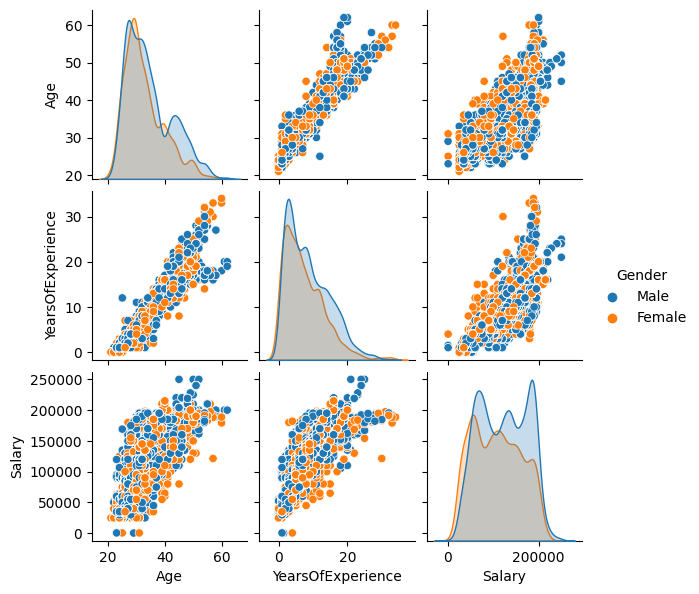

In [ ]:
sns.pairplot(data = df_salary, hue = "Gender", height=2)

- Semakin lama pengalaman kerja seseorang, semakin tinggi gajinya.
- Semakin tua usia seseorang, semakin lama pula pengalaman kerja yang dimiliki.

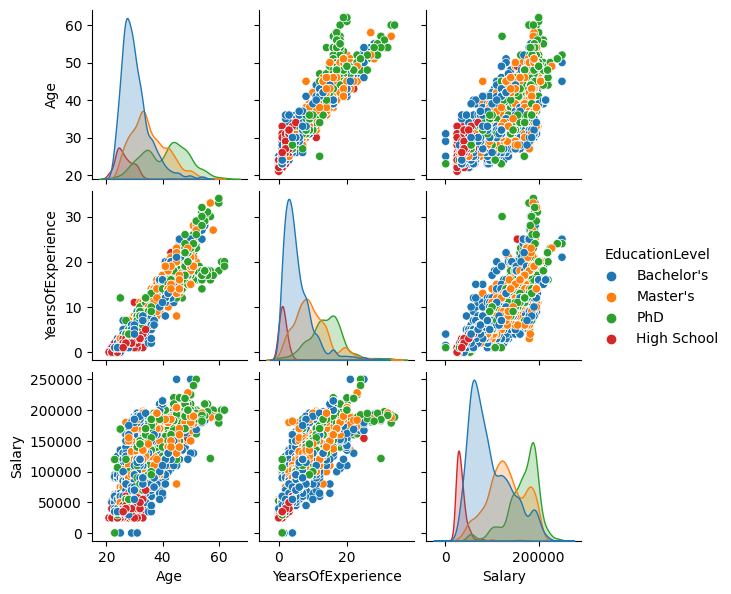

In [ ]:
sns.pairplot(data = df_salary, hue = "EducationLevel", height=2, palette="tab10")

- Semakin tinggi tingkat pendidikan seseorang, semakin tinggi gajinya.
- Tingkat pendidikan yang tinggi cenderung dimiliki seseorang dengan usia yang lebih tua.
- Tingkat pendidikan yang tinggi cenderung dimiliki oleh seseorang dengan lama pengalaman kerja yang tinggi pula.

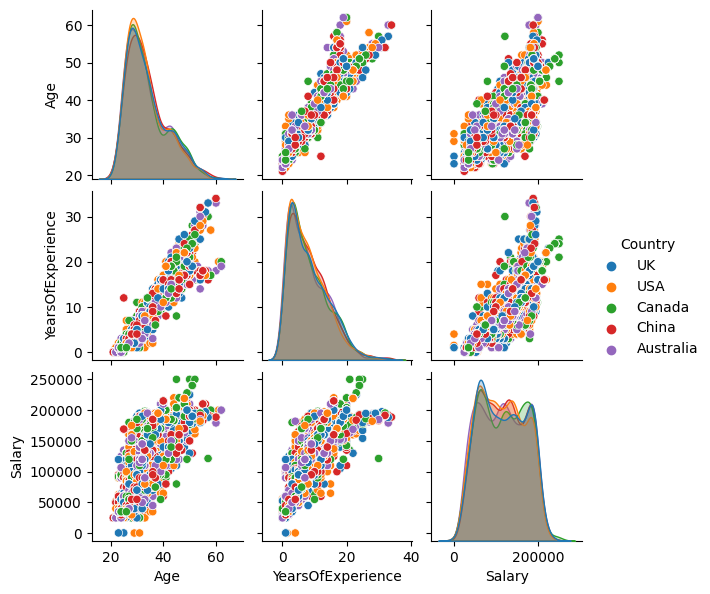

In [ ]:
sns.pairplot(data = df_salary, hue = "Country", height=2, palette="tab10")

Asal negara tidak terlalu berdampak signifikan pada gaji.




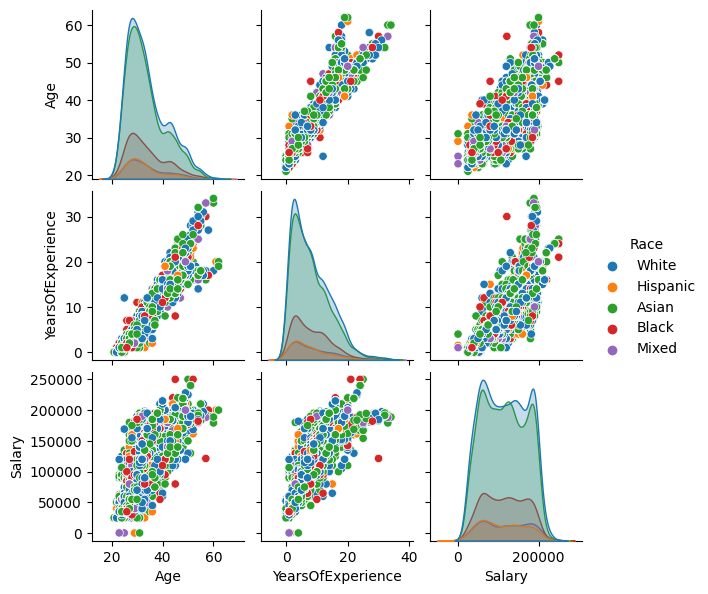

In [ ]:
sns.pairplot(data = df_salary, hue = "Race", height=2, palette="tab10")

*   Orang dengan ras white dan asian cenderung lebih tua.
*   Orang dengan ras white dan asian cenderung lebih lama pengalaman kerjanya.
*   Orang dengan ras white dan asian cenderung lebih besar gajinya.





# 3. Uji Statistik

$H_0$: Rata-rata gaji laki-laki sama dengan dari rata-rata gaji perempuan.
$$ H_0:\mu_A = \mu_B $$

$H_1$: Rata-rata gaji laki-laki lebih besar dari rata-rata gaji perempuan.
$$ H_1:\mu_A > \mu_B $$

In [ ]:
significance_level = 0.10

## 3.1. Preanalysis

In [ ]:
# Menghitung jumlah data laki-laki dan perempuan
df_salary.groupby("Gender")["Salary"].mean()

Gender
Female    107888.998672
Male      121395.697630
Name: Salary, dtype: float64

Rata-rata gaji laki-laki lebih besar dari rata-rata gaji perempuan.

## 3.2. Analysis

Karena standar deviasi populasi tidak diketahui, digunakan t-test.
Sebelum menggunakan t-test, dilakukan uji variansi.

In [ ]:
# Gaji Laki-laki
df_male = df_salary[df_salary["Gender"]=="Male"]["Salary"].values

# Gaji Perempuan
df_female = df_salary[df_salary["Gender"]=="Female"]["Salary"].values

# Variansi
np.var(df_male), np.var(df_female)

(2713527473.797431, 2778856460.0537653)

Dapat disimpulkan bahwa variansi tidak sama.

In [ ]:
from scipy import stats
result = stats.ttest_ind(a = df_male,
                         b = df_female,
                         equal_var=False,
                         alternative = "greater")

In [ ]:
result.pvalue

8.848221350329085e-26

In [ ]:
result.statistic

10.476997992981117

In [ ]:
# Menentukan aturan keputusan
if result.pvalue<significance_level:
    print("Tolak hipotesis nol.")
else:
    print("Gagal menolak hipotesis nol.")

Tolak hipotesis nol.


Terdapat cukup bukti bahwa rata-rata gaji laki-laki dan perempuan tidak sama.
Rata-rata gaji laki-laki lebih tinggi dan rata-rata gaji perempuan.

## 3.3. Derajat Kebebasan

In [ ]:
df_data = len(df_male)+len(df_female)
df_data

6684

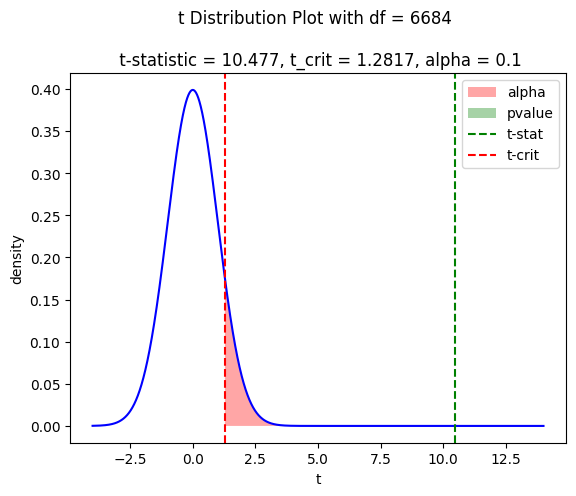

In [ ]:
# plot sample distribution
x = np.arange(-4, 14, 0.001)
plt.plot(x, stats.t.pdf(x, df = df_data),
         color='blue')

# plot alpha region
x_alpha = np.arange(stats.t.ppf(1-significance_level, df = df_data), 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, df = df_data)
plt.fill_between(x = x_alpha,
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35,
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(result.statistic, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, df = df_data)

plt.fill_between(x = x_pvalue,
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35,
                 label = 'pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(result.statistic, 4),
            color ="green",
            linestyle = "--",
            label ="t-stat")

t_crit = np.round(stats.t.ppf(1-significance_level, df = df_data), 4)
plt.axvline(t_crit,
            color ="red",
            linestyle = "--",
            label ="t-crit")

plt.legend()
plt.xlabel("t")
plt.ylabel("density")


plt.title(f't Distribution Plot with df = {df_data} \n\n t-statistic = {np.round(result.statistic, 4)}, t_crit = {np.round(t_crit,4)}, alpha = {significance_level}');

## 3.4. Confidence Level

In [ ]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

cm = CompareMeans(d1 = DescrStatsW(data=df_male),
                  d2 = DescrStatsW(data=df_female))

lower, upper = cm.tconfint_diff(alpha=significance_level,
                                alternative='two-sided',
                                usevar='unequal')

print("Confidence Interval", ":", "[", lower, upper, "]")

Confidence Interval : [ 11385.88545592349 15627.512459384583 ]


Dari hasil yang didapat, disimpulkan bahwa kita 90% yakin bahwa rata-rata gaji laki-laki lebih dari rata-rata gaji perempuan.
Dari confidence interval yang didapat, disimpulkan kita 90% yakin bahwa rata-rata perbedaan gaji memiliki interval di 11385 sampai dengan 15627.

# 4. Regression Modelling

## 4.1. Persiapan Data

### a. Menghapus kolom Job Title karena tidak akan digunakan

In [ ]:
df_salary.drop("Job Title", axis=1, inplace=True)
df_salary.head()

,Age,Gender,EducationLevel,YearsOfExperience,Salary,Country,Race
0,32.0,Male,Bachelor's,5.0,90000.0,UK,White
1,28.0,Female,Master's,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,20.0,200000.0,USA,Asian


### b. Mengubah Data Kategorik Menjadi Numerik

#### Cek Isi Data Education Level

In [ ]:
df_salary["EducationLevel"].value_counts()

Bachelor's     3021
Master's       1858
PhD            1369
High School     436
Name: EducationLevel, dtype: int64

#### Cek Isi Data Gender

In [ ]:
df_salary["Gender"].value_counts()

Male      3671
Female    3013
Name: Gender, dtype: int64

In [ ]:
df_salary["Country"].value_counts()

USA          1356
China        1339
Australia    1335
UK           1332
Canada       1322
Name: Country, dtype: int64

In [ ]:
df_salary["Race"].value_counts()

White       2742
Asian       2499
Black        787
Mixed        334
Hispanic     322
Name: Race, dtype: int64

#### Mengubah Data

Gender (binary):
Male = 0,
Female = 1

Education Level (ordinal):
Bachelor's = 0,
Master's = 1,
PhD = 2
High School = 3

In [ ]:
df_salary["Gender"] = df_salary["Gender"].map({"Male":0,"Female":1})
df_salary["EducationLevel"] = df_salary["EducationLevel"].map({"Bachelor's":0,"Master's":1,"PhD":2, "High School":3})
df_salary["Country"] = df_salary["Country"].map({"USA":0,"China":1,"Australia":2,"UK":3,"Canada":4})
df_salary["Race"] = df_salary["Race"].map({"White":0,"Asian":1,"Black":2,"Mixed":3,"Hispanic":4})
df_salary.head()

,Age,Gender,EducationLevel,YearsOfExperience,Salary,Country,Race
0,32.0,0,0,5.0,90000.0,3,0
1,28.0,1,1,3.0,65000.0,0,4
2,45.0,0,2,15.0,150000.0,4,0
3,36.0,1,0,7.0,60000.0,0,4
4,52.0,0,1,20.0,200000.0,0,1


In [ ]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6684 entries, 0 to 6703
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                6684 non-null   float64
 1   Gender             6684 non-null   int64  
 2   EducationLevel     6684 non-null   int64  
 3   YearsOfExperience  6684 non-null   float64
 4   Salary             6684 non-null   float64
 5   Country            6684 non-null   int64  
 6   Race               6684 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 417.8 KB


## 4.2. Single Predictor Modelling

Melihat hubungan antara lama pengalaman kerja dengan gaji.

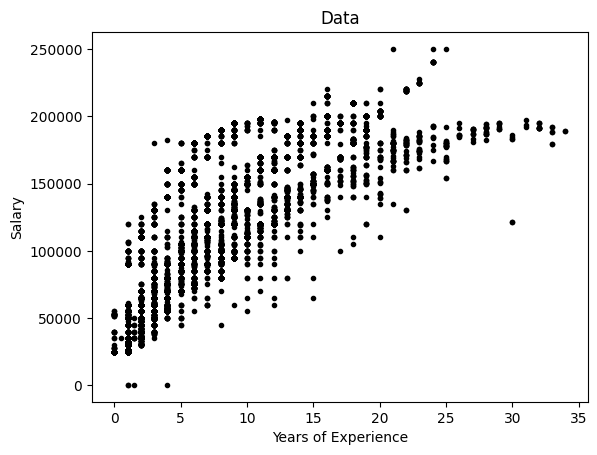

In [ ]:
x = df_salary["YearsOfExperience"]
y = df_salary["Salary"]

# Plot the data
plt.scatter(x, y, color = "k", marker=".")

# Add a legend and labels
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

Menunjukkan hubungan positif yaitu semakin lama pengalaman kerja, semkain tinggi gaji.
Untuk pengalaman kerja yang lebih lama, variasi gaji cenderung lebih besar.

### a. Fit Linear Regression - Using Horsepower Variable

In [ ]:
# Create OLS model object
model = smf.ols("Salary ~ YearsOfExperience", df_salary)

# Fit the model
results_model_salary = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_salary = print_coef_std_err(results_model_salary)
results_salary

,coef,std err
Intercept,57935.013495,631.916170
YearsOfExperience,7102.516670,62.693093


In [ ]:
results_model_salary.rsquared

0.657626237954604

$$\text{Salary} = 57935 + 7102\times\text{Years of Experience}$$

Jika membandingkan dua orang yang memiliki 1 tahun perbedaan pada lama pengalaman kerja, diperkirakan orang yang memiliki pengalaman kerja lebih lama memiliki gaji yang lebih besar dengan selisih 7102.

Untuk seseorang yang memiliki lama pengalaman kerja 0 tahun, perkiraan rata-rata gaji yang didapatkan adalah sebesar 57935.

**Visualisasi**

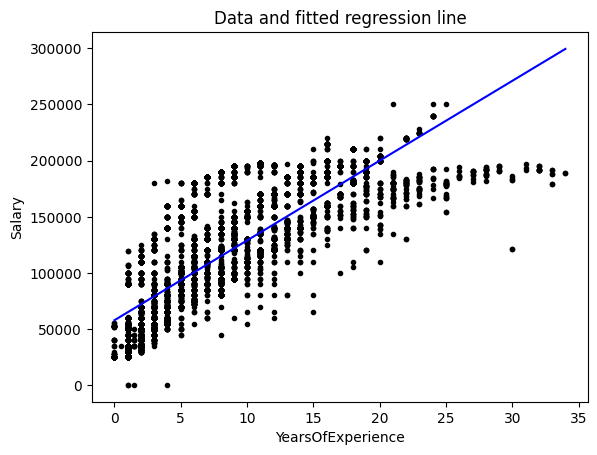

In [ ]:
predictor = "YearsOfExperience"
outcome = "Salary"
data = df_salary.copy()
results_ = results_salary.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
# plt.legend()
plt.ylabel(outcome)
plt.xlabel(predictor)

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

**Residual plot**

Text(0.5, 1.0, 'Residuals vs. Predicted mpg')

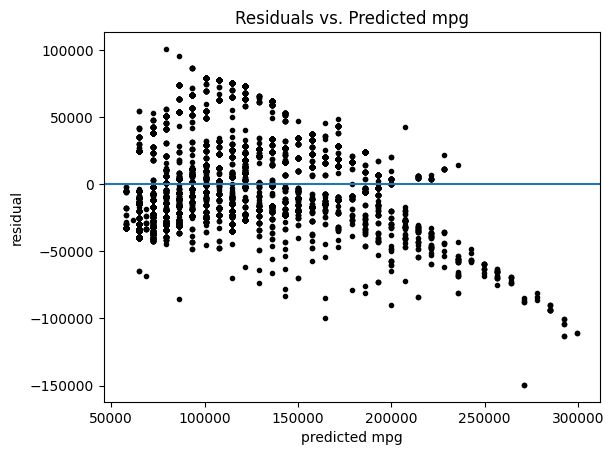

In [ ]:
# Residual Plot and Explained Variance
plt.scatter(results_model_salary.fittedvalues, results_model_salary.resid, marker=".", c = "k")

# Plot the horizontal line in 0 as the fitted line
plt.axhline([0])

plt.xlabel("predicted mpg")
plt.ylabel("residual")
plt.title(f"Residuals vs. Predicted mpg")

In [ ]:
results_model_salary.rsquared

0.657626237954604

Residual menghasilkan pola yang terlihat jelas, hal ini membuat ketidaksesuaian lebih terlihat meskipun garis regresi menjelaskan lebih dari 65% variansi lama pengalaman kerja.

**Normality of Error Assumption**

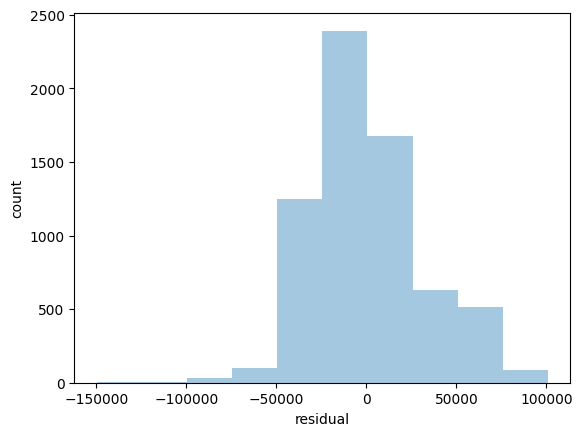

In [ ]:
# Normality of Error Assumption

plt.hist(results_model_salary.resid, color='tab:blue', alpha=0.4)
plt.xlabel("residual")
plt.ylabel("count")

plt.show()

### b. Fit Linear Regression - Using Log Transform on Weight Variable

In [ ]:
df_salary["logYOE"] = np.log(df_salary["YearsOfExperience"])
df_salary.loc[df_salary["YearsOfExperience"] == 0, "logYOE"] = 0
df_salary.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,6684.0,33.610563,7.595994,21.000000,28.000000,32.00000,38.000000,62.000000
Gender,6684.0,0.450778,0.497609,0.000000,0.000000,0.00000,1.000000,1.000000
EducationLevel,6684.0,0.883303,0.950911,0.000000,0.000000,1.00000,2.000000,3.000000
YearsOfExperience,6684.0,8.077723,6.029305,0.000000,3.000000,7.00000,12.000000,34.000000
Salary,6684.0,115307.175194,52806.810881,350.000000,70000.000000,115000.00000,160000.000000,250000.000000
Country,6684.0,1.988779,1.415068,0.000000,1.000000,2.00000,3.000000,4.000000
Race,6684.0,0.951975,1.076707,0.000000,0.000000,1.00000,1.000000,4.000000
logYOE,6684.0,1.759051,0.891232,-0.693147,1.098612,1.94591,2.484907,3.526361


In [ ]:
# Create OLS model object
model = smf.ols("Salary ~ logYOE", df_salary)

# Fit the model
results_logtransform = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_salary_log = print_coef_std_err(results_logtransform)
results_logtransform.rsquared

0.7116310655293663

Nilai R Squared regresi linier dengan transformasi log lebih besar daripada tanpa transformasi.
Performa regresi dengan transformasi lebih baik.

## 4.3. Multiple Predictors Modelling

**Data preparation**

In [ ]:
# Mengembalikan data tabel
df_salary.drop("logYOE", axis=1, inplace=True)
df_salary.head()

,Age,Gender,EducationLevel,YearsOfExperience,Salary,Country,Race
0,32.0,0,0,5.0,90000.0,3,0
1,28.0,1,1,3.0,65000.0,0,4
2,45.0,0,2,15.0,150000.0,4,0
3,36.0,1,0,7.0,60000.0,0,4
4,52.0,0,1,20.0,200000.0,0,1


In [ ]:
class StatsmodelsRegressor(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """

    def __init__(self, sm_class, sm_formula):
        self.sm_class = sm_class
        self.sm_formula = sm_formula
        self.model = None
        self.result = None

    def fit(self, data, dummy):
        self.model = self.sm_class(self.sm_formula, data)
        self.result = self.model.fit()

    def predict(self,X):
        return self.result.predict(X)

def kfold_split(data, n_fold):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param data: <pandas DataFrame>
    :param n_fold: <int> Number of fold in k-fold CV
    :return fold_train: <pandas DataFrame> Training Data
    :return fold_test: <pandas DataFrame> Testing Data
    """
    kfold = KFold(n_splits = n_fold,
                  shuffle = True,
                  random_state=123)
    fold_train = {}
    fold_test = {}

    for i, (train, test) in enumerate(kfold.split(data)):
        print(f"fold {i+1}, train data rows: {len(train)}, test data rows: {len(test)}")
        fold_train[i] = data.iloc[train].copy()
        fold_test[i] = data.iloc[test].copy()

    return (fold_train, fold_test)

### Evaluate a model using K-fold cross validation

In [ ]:
# Create a class model
ols_all_pred = StatsmodelsRegressor(smf.ols, "Salary ~ Age +  Gender + C(EducationLevel) + Race + Country + YearsOfExperience + Age:YearsOfExperience")

# Create k-fold splitter object
kfold = KFold(n_splits=5, shuffle = True, random_state=123)

scores_ols_all_pred = cross_val_score(estimator = ols_all_pred,
                                       X = df_salary,
                                       y = df_salary["Salary"],
                                       cv = kfold,
                                       scoring = "r2")
scores_ols_all_pred = pd.DataFrame(data = scores_ols_all_pred,
                                    columns=["test_rsquared"])
scores_ols_all_pred["folds"] = [f"Folds {i+1}" for i in range(5)]
scores_ols_all_pred

,test_rsquared,folds
0,0.759508,Folds 1
1,0.738758,Folds 2
2,0.745888,Folds 3
3,0.765444,Folds 4
4,0.741773,Folds 5


In [ ]:
scores_ols_all_pred["test_rsquared"].mean()

0.7504575523323711

The model use all media have good fit, it can explain 88.59% variance of salary. Let's build the model using whole data to infer the estimated coefficient from the model, and gain the insight from business prespective

## Fit Linear Regression - Using All Predictors

In [ ]:
# Create OLS model object
model = smf.ols("Salary ~ Age + Gender + C(EducationLevel) + Race + Country + YearsOfExperience + Age:YearsOfExperience", df_salary)

# Fit the model
results_model_salary = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_salary = print_coef_std_err(results_model_salary)
results_salary

,coef,std err
Intercept,53250.822023,3737.948616
C(EducationLevel)[T.1],5847.019743,864.247971
C(EducationLevel)[T.2],20059.805197,1049.646099
C(EducationLevel)[T.3],-25058.519605,1425.260561
Age,-235.204851,137.459072
Gender,-5393.177226,665.088171
Race,-254.486388,302.823858
Country,300.855820,230.364034
YearsOfExperience,16172.099090,311.394978
Age:YearsOfExperience,-199.395766,6.637300


Nilai usia, gender dan ras negatif sehingga kurang bermakna.

### Melakukan Centering Predictor Age

Centering dilakukan agar interpretasi hasil regresi lebih baik.

In [ ]:
mean_age = df_salary["Age"].mean()
mean_age = np.round(mean_age,0)
mean_age

34.0

In [ ]:
df_salary["Age"] = df_salary["Age"]-mean_age
df_salary.rename(columns = {"Age":"AgeCentered"}, inplace=True)
df_salary.head()

,AgeCentered,Gender,EducationLevel,YearsOfExperience,Salary,Country,Race
0,-2.0,0,0,5.0,90000.0,3,0
1,-6.0,1,1,3.0,65000.0,0,4
2,11.0,0,2,15.0,150000.0,4,0
3,2.0,1,0,7.0,60000.0,0,4
4,18.0,0,1,20.0,200000.0,0,1


In [ ]:
# Create a class model
ols_all_pred = StatsmodelsRegressor(smf.ols, "Salary ~ AgeCentered + Gender + C(EducationLevel) + YearsOfExperience + Country + Race + AgeCentered:YearsOfExperience")

# Create k-fold splitter object
kfold = KFold(n_splits=5, shuffle = True, random_state=20)

scores_ols_all_pred = cross_val_score(estimator = ols_all_pred,
                                       X = df_salary,
                                       y = df_salary["Salary"],
                                       cv = kfold,
                                       scoring = "r2")
scores_ols_all_pred = pd.DataFrame(data = scores_ols_all_pred,
                                    columns=["test_rsquared"])
scores_ols_all_pred["folds"] = [f"Folds {i+1}" for i in range(5)]
scores_ols_all_pred

,test_rsquared,folds
0,0.759313,Folds 1
1,0.759307,Folds 2
2,0.749453,Folds 3
3,0.739293,Folds 4
4,0.744070,Folds 5


In [ ]:
scores_ols_all_pred["test_rsquared"].mean()

0.7502874434492411

The model use all media have good fit, it can explain 75% variance of salary. Let's build the model using whole data to infer the estimated coefficient from the model, and gain the insight from business prespective.

In [ ]:
# Create OLS model object
model = smf.ols('Salary ~ AgeCentered + Gender + C(EducationLevel) + Country + Race + YearsOfExperience + AgeCentered:YearsOfExperience', df_salary)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_salary = print_coef_std_err(results)
results_salary

,coef,std err
Intercept,45253.857096,1504.578705
C(EducationLevel)[T.1],5847.019743,864.247971
C(EducationLevel)[T.2],20059.805197,1049.646099
C(EducationLevel)[T.3],-25058.519605,1425.260561
AgeCentered,-235.204851,137.459072
Gender,-5393.177226,665.088171
Country,300.855820,230.364034
Race,-254.486388,302.823858
YearsOfExperience,9392.643033,163.531642
AgeCentered:YearsOfExperience,-199.395766,6.637300


$$\text{Salary for High School} = 45254 - 235\times\text{(Age - 34)} - 5393\times\text{Gender} + 301\times\text{Country} - 254\times\text{Race} + 9393\times\text{YearsOfExperience} - 199\times\text{(Age - 34)}\times\text{YearsOfExperience} $$

$$\text{Salary for Bachelor's} = 45254 + 5847 - 235\times\text{(Age - 34)} - 5393\times\text{Gender}  + 301\times\text{Country} - 254\times\text{Race} + 9393\times\text{YearsOfExperience} - 199\times\text{(Age - 34)}\times\text{YearsOfExperience} $$

$$\text{Salary for Master's} = 45254 + 20060 - 235\times\text{(Age - 34)} - 5393\times\text{Gender}  + 301\times\text{Country} - 254\times\text{Race} + 9393\times\text{YearsOfExperience} - 199\times\text{(Age - 34)}\times\text{YearsOfExperience} $$

$$\text{Salary for PhD} = 45254 - 25058 - 235\times\text{(Age - 34)} - 5393\times\text{Gender}  + 301\times\text{Country} - 254\times\text{Race} + 9393\times\text{YearsOfExperience} - 199\times\text{(Age - 34)}\times\text{YearsOfExperience} $$

**Interpretasi tingkat pendidikan**


Jika membandingkan dua orang yang memiliki usia, jenis kelamin, lama pengalaman kerja yang sama, gaji seseorang dengan tingkat pendidikan Bachelor's diperkirakan lebih tinggi 5847 dollar daripada gaji seseorang dengan tingkat pendidikan High School.

**Interpretasi usia**

Jika membandingkan dua orang yang memiliki jenis kelamin dan tingkat pendidikan yang sama, serta pengalaman kerja 0 tahun, seseorang yang usianya 1 tahun lebih tua dari 34 tahun diperkirakan memiliki gaji lebih tinggi 235 dollar daripada seseorang berusia 34 tahun.

**Interpretasi jenis kelamin**

Jika membandingkan dua orang yang memiliki usia, lama pengalaman kerja, dan tingkat pendidikan yang sama, perempuan diperkiraan memiliki gaji lebih sedikit 5393 dollar dibandingkan laki-laki.

**Interpretasi asal negara**

Jika membandingkan dua orang yang memiliki usia, lama pengalaman kerja, dan tingkat pendidikan yang sama, USA diperkiraan memiliki gaji lebih sedikit 301 dollar dibandingkan asal negara Australia.

**Intrepetasi ras**

Jika membandingkan dua orang yang memiliki usia, lama pengalaman kerja, dan tingkat pendidikan yang sama, hispanik diperkiraan memiliki gaji lebih sedikit 254 dollar dibandingkan ras asian.

**Interpretasi lama pengalaman kerja**

Jika membandingkan dua orang berusia 34 tahun yang memiliki jenis kelamin dan tingkat pendidikan yang sama, seseorang dengan lama pengalaman kerja lebih lama 1 tahun diperkirakan memiliki gaji lebih tinggi 199 dollar.

Text(0.5, 1.0, 'Residuals vs. Predicted mpg')

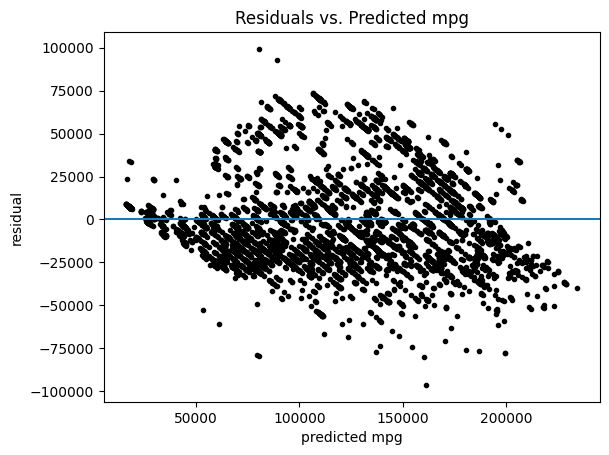

In [ ]:
# Residual Plot and Explained Variance
plt.scatter(results.fittedvalues, results.resid, marker=".", c = "k")

# Plot the horizontal line in 0 as the fitted line
plt.axhline([0])

plt.xlabel("predicted mpg")
plt.ylabel("residual")
plt.title(f"Residuals vs. Predicted mpg")

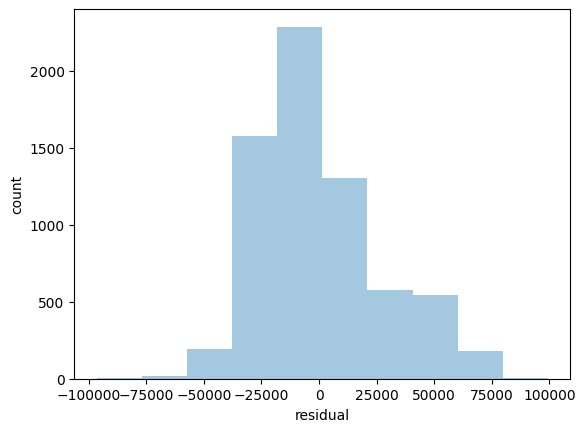

In [ ]:
# Normality of Error Assumption

plt.hist(results.resid, color='tab:blue', alpha=0.4)
plt.xlabel("residual")
plt.ylabel("count")

plt.show()